In [1]:
# load libraries
import pyforest
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [2]:
# load data
data = pd.read_csv("data/Instagram data.csv", encoding="latin1")
data.head()

<IPython.core.display.Javascript object>

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [3]:
# dataset with null values
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [4]:
# data insight
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x800 with 0 Axes>

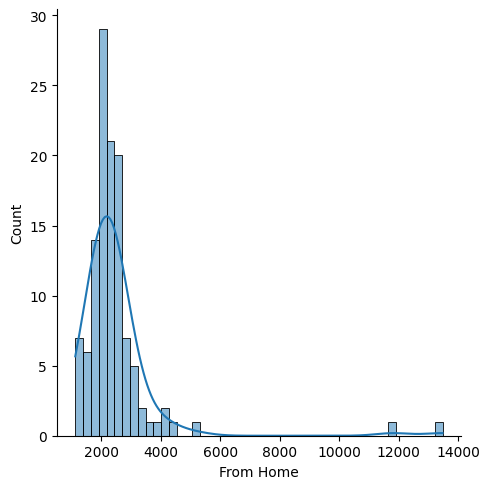

In [5]:
# ig reach from home impression
plt.figure(figsize=(10,8))
# plt.style.use('fivethirtyeight')
# plt.title("Distribution of Impressions From Home")
sns.displot(data, x = 'From Home', kde=True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x800 with 0 Axes>

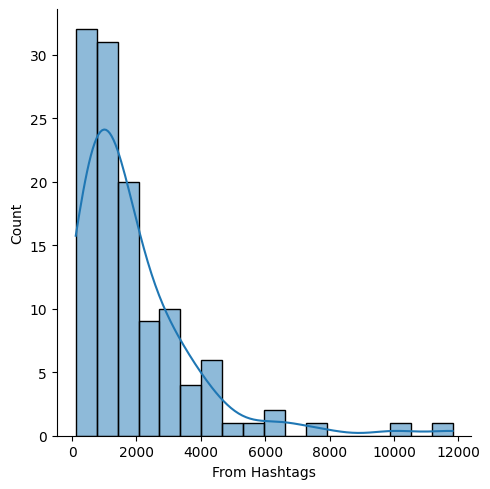

In [6]:
# ig reach from hashtags impression
plt.figure(figsize=(10,8))
# plt.style.use('fivethirtyeight')
# plt.title("Distribution of Impressions From Home")
sns.displot(data, x = 'From Hashtags', kde=True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x800 with 0 Axes>

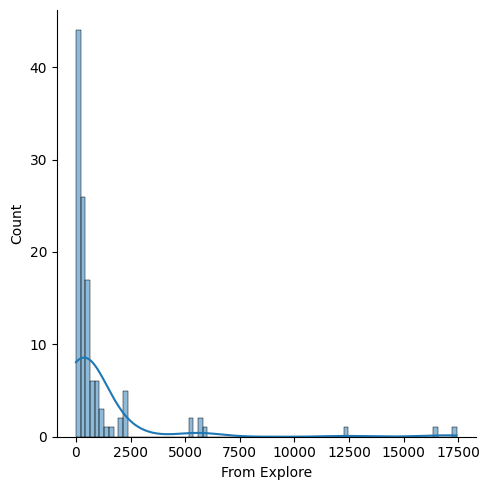

In [7]:
# ig reach from exlore impression
plt.figure(figsize=(10,8))
# plt.style.use('fivethirtyeight')
# plt.title("Distribution of Impressions From Home")
sns.displot(data, x = 'From Explore', kde=True)

In [8]:
home = data['From Home'].sum()
explore = data['From Explore'].sum()
hashtags = data['From Hashtags'].sum()
other = data['From Other'].sum()

labels = ['From Home', 'From Explore', 'From Hashtags','From Other']
values = [ home, explore, hashtags, other ]
fig = px.pie(data, values=values, names=labels, title="Ig post impressions", hole=0.5)
fig.write_html('ig_impression.html', auto_open=True)

Opening in existing browser session.


MESA-INTEL: warning: Haswell Vulkan support is incomplete


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

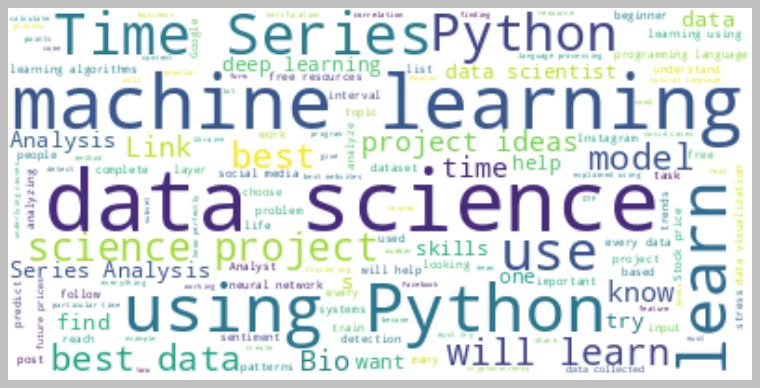

In [9]:
# Analyzing content
text = " ".join(i  for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

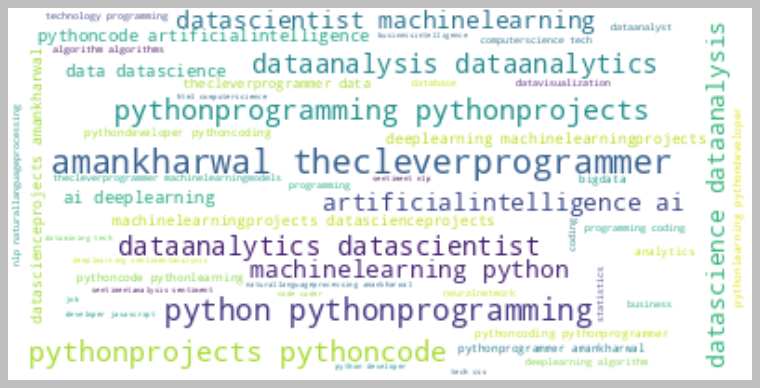

In [10]:
text = " ".join(i  for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>

<Axes: xlabel='Impressions', ylabel='Likes'>

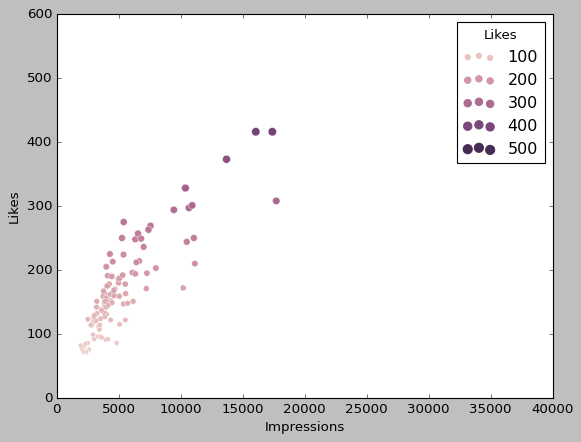

In [11]:
# Analyzing Relationship
sns.scatterplot(data, x="Impressions",
                    y="Likes", size="Likes", hue='Likes')

<IPython.core.display.Javascript object>

<Axes: xlabel='Impressions', ylabel='Comments'>

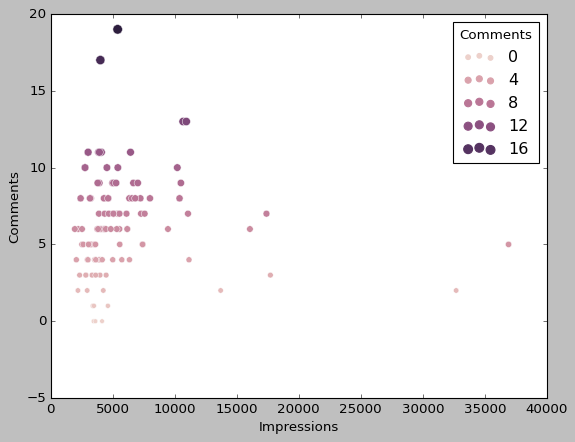

In [12]:
sns.scatterplot(data, x="Impressions",
                    y="Comments", size="Comments", hue='Comments')

<IPython.core.display.Javascript object>

<Axes: xlabel='Impressions', ylabel='Shares'>

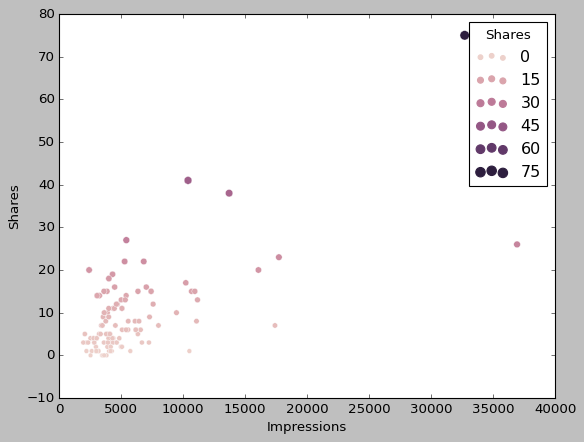

In [13]:
sns.scatterplot(data, x="Impressions",
                    y="Shares", size="Shares", hue='Shares')

<IPython.core.display.Javascript object>

<Axes: xlabel='Impressions', ylabel='Saves'>

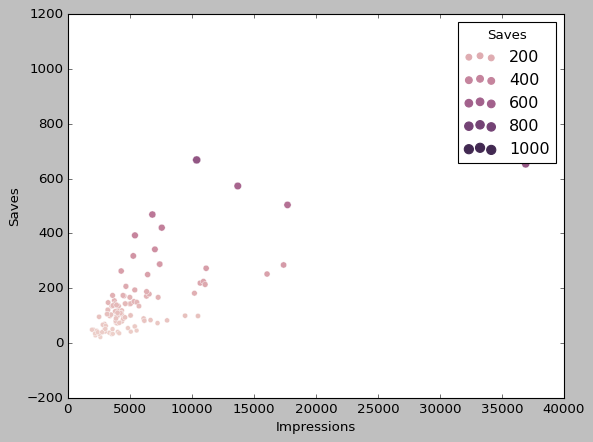

In [14]:
sns.scatterplot(data, x="Impressions",
                    y="Saves", size="Saves", hue='Saves')

In [15]:
# data correlation
correlation = data.corr(numeric_only=True)
correlation['Impressions'].sort_values(ascending=False)

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

In [16]:
# conversion rate
conversion_rate = ( data['Follows'].sum()/data['Profile Visits'].sum())*100
conversion_rate

41.00265604249668

<IPython.core.display.Javascript object>

<Axes: xlabel='Follows', ylabel='Profile Visits'>

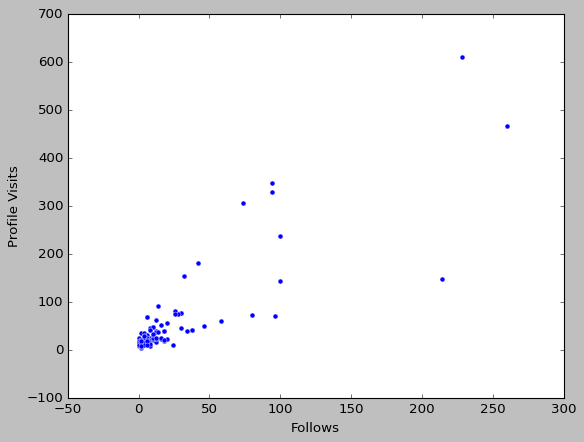

In [17]:
sns.scatterplot(data, x='Follows', y='Profile Visits')


### Model  Prediction

In [18]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data['Impressions'])

# split data
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# model training
model = PassiveAggressiveRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7987266176670388